# Transformada $\mathcal{Z}$

A transformada $\mathcal{Z}$ é a transformada de Laplace aplicada a sistemas de tempo discreto.

## Transformada $\mathcal{Z}$

A transformada $\mathcal{Z}$ da sequência $x[k]$ é definida como:

$$
\begin{align*}
     \mathcal{Z}\{x[k]\} = X(z) =\sum_{k=0}^\infty x[k]\,z^{-k}
\end{align*}
$$

Sinal discreto: $k \in \mathbb{Z}$
$$
\begin{align*}
\mathcal{Z}\{f[k-1]\} = z^{-1}F(z)
\end{align*}
$$

Equações de diferenças:  
$$
\begin{align*}
y[k]&=-a_1y[k-1]-a_2y[k-2]+b_0u[k]+b_1u[k-1]\\&+b_2u[k-2]
\end{align*}
$$

Função de transferência discreta:  
$$
\begin{align}
\displaystyle\frac{Y(z)}{U(z)} = \frac{b_0+b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}+a_2z^{-2}}
\end{align}
$$

In [1]:
import numpy as np
y = np.zeros((10,))
y[0] = 0
y[1] = 1
for k in np.arange(2,10):
    y[k] = y[k-1]+y[k-2]

print(y)


[ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34.]


## Transformadas elementares

Para a maioria dos resultados, usamos a fórmula da PG infinita:
$$
\begin{align}
    1+q+q^2+q^3+\ldots = \frac{1}{1-q}
\end{align}
$$

**Impulso discreto** - $\delta[k]$

$$
\begin{align}
    \mathcal{Z}\{\delta[k]\} = 1
\end{align}
$$

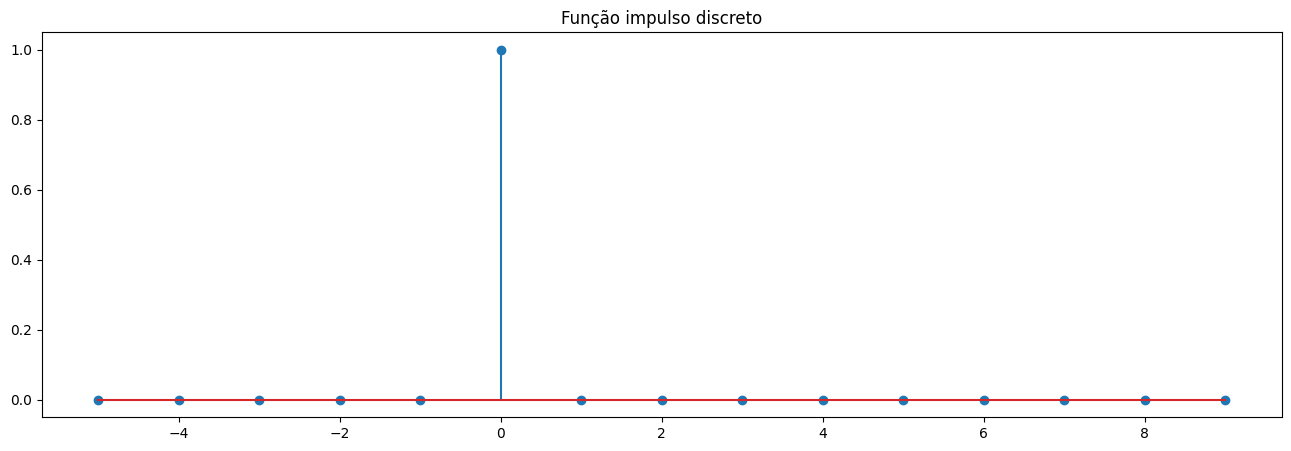

In [2]:
import numpy as np
from matplotlib import pyplot as plt
k = np.arange(-5,10)
delta = lambda k: k==0
plt.figure(figsize=(16,5))
plt.stem(k,delta(k))
plt.title('Função impulso discreto');

**Degrau discreto** - $u[k]$

$$
\begin{align}
    \mathcal{Z}\{u[k]\} = \frac{z}{z-1} = \frac{1}{1-z^{-1}}
\end{align}
$$

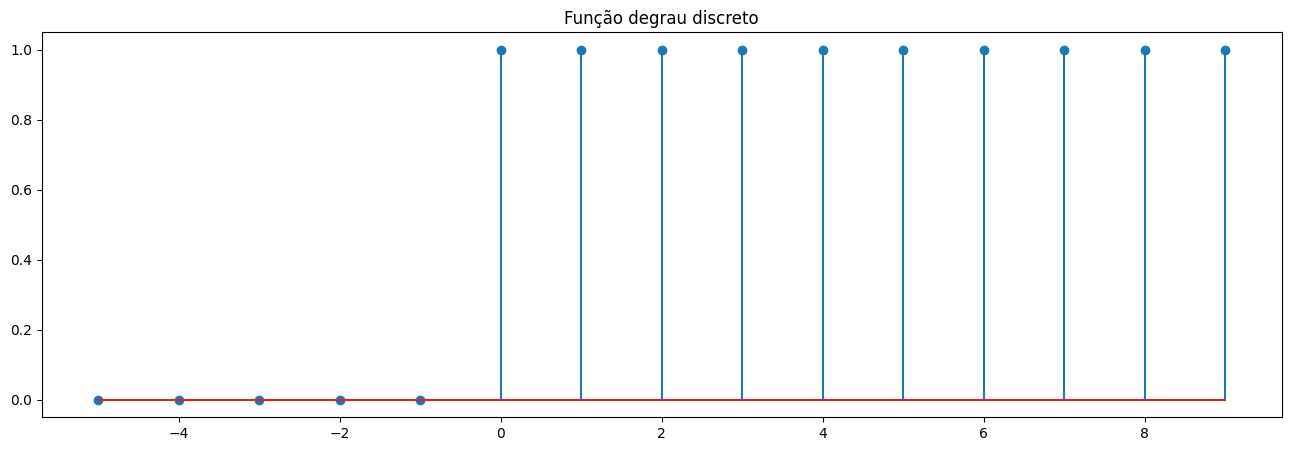

In [3]:
degrau = lambda k: k>=0
plt.figure(figsize=(16,5))
plt.stem(k,degrau(k))
plt.title('Função degrau discreto');

**Exponencial discreta** - $a^k\, u[k]$

$$
\begin{align}
    \mathcal{Z}\{a^k\,u[k]\} = \frac{z}{z-a} = \frac{1}{1-az^{-1}}
\end{align}
$$

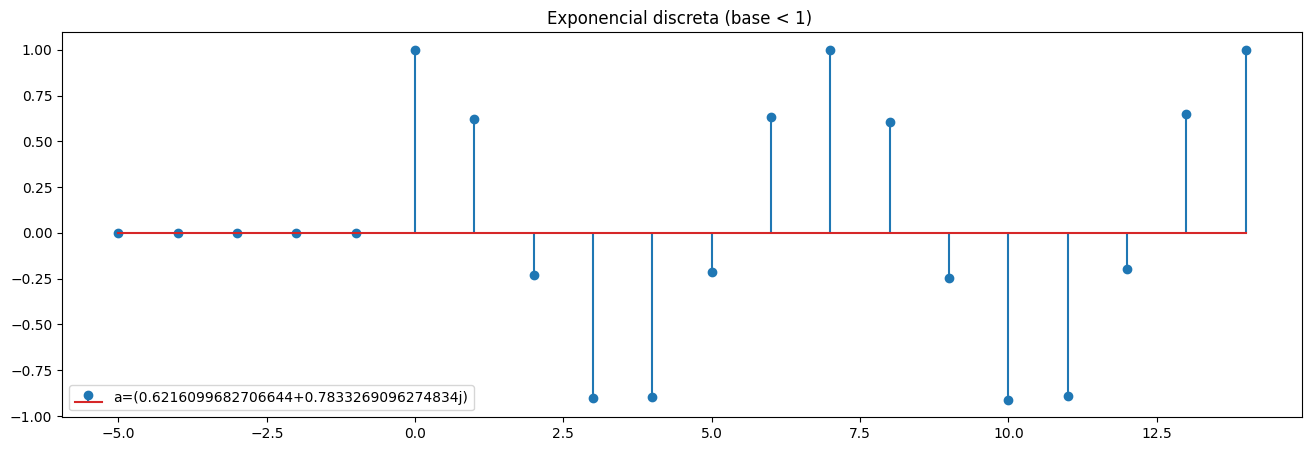

In [4]:
a = 1*np.exp(1j*0.9)
k = np.arange(-5,15)
expo = lambda k: np.real(a**k * degrau(k))
plt.figure(figsize=(16,5))
plt.stem(k,expo(k), label = f'a={a}');
plt.title('Exponencial discreta (base < 1) ');
plt.legend();


In [5]:
np.angle(0.2+1.8j)

1.460139105621001

## Propriedades

As propriedades mais importantes da transformada $\mathcal{Z}$ são:

**Linearidade**

$$
\begin{align}
    k_1\,x_1[k] + k_2\,x_2[k] \longleftrightarrow k_1\,X_1(z) + k_2\,X_2(z)
\end{align}
$$

**Convolução**

$$
\begin{align}
    x[k]*h[k] = \sum_{n=-\infty}^{\infty} x[n]h[k-n] \longleftrightarrow X(z)H(z)
\end{align}
$$

Uma consequência disso é que as regras de diagramas de blocos para sistemas discretos são as mesmas dos sistemas contínuos. 

**Deslocamento e condição inicial**

$$
\begin{align}
    x[k+1] \longleftrightarrow zX(z)-zx[0]
\end{align}
$$


Todas as outras transformadas podem ser deduzidas das tabelas acima.

Por exemplo:
$$
\begin{align}
\mathcal{Z}\{A\,\cos(\omega k)\} &= \mathcal{Z}\left\{\frac{Ae^{j\omega k}}{2}+\frac{Ae^{-j\omega k}}{2}\right\}\\[10pt]
&= \frac{Az}{2(z-e^{j\omega})}+\frac{Az}{2(z-e^{-j\omega})}\\
&= \frac{Az(z-\cos\omega)}{z^2+2z\cos\omega+1}
\end{align}
$$

## Transformada $\mathcal{Z}$ inversa

Expansão em frações parciais de $\displaystyle\frac{X(z)}{z} \longrightarrow x[k]$.  

**Exemplo**: use expansão em fraçõs parciais para determinar a transformada inversa de $Y(z) = \displaystyle\frac{28(z+1)(z-0.7)}{(z-1)(z-0.9)(z+0.9)}$

In [12]:
#
from scipy.signal import residue
from IPython.display import display, Math
import sympy as sp


z = sp.symbols('z')
num = 28*np.convolve([1,1],[1,-0.7])
den = np.poly([1, 0.9, -0.9, 0])


r,p,k = residue(num,den)
print('Resíduos: ', r.round(2))
print('Pólos: ', p)
s = ''
S = 0
for R,P in zip(r,p):
    S += R.round(2)*z/(z-P.round(2))
print('')
display(Math('Y(z) = ' + sp.latex(S)))
print('') 


Resíduos:  [-24.2    1.46 -65.68  88.42]
Pólos:  [ 0.  -0.9  0.9  1. ]



<IPython.core.display.Math object>

Portanto:
$$
\begin{align*}
    y[k] &= 1.46(-0.9)^k\, u[k] - 65.68(0.9)^k\,u[k]\\&\,+88.42u[k]-24.2\delta[k]
\end{align*}
$$

Usamos a transformada inversa para ter um sentimento qualitativo da resposta do sistema e para explicar o que está acontecendo com a dinâmica. Para efeitos de cálculo mesmo, apenas resolvemos numericamente as equações de diferenças. 

Para projeto de controle, o ideal é converter a função para equação de diferenças.

## Relação entre $s$ e $z$

$$
\begin{align}
 z &= e^{sT}
\end{align}
$$

- Eixo imaginário $\longrightarrow$ circunferência unitária
- SPE/SPD $\longrightarrow$ interior/exterior do círculo unitário
- Origem $s=0$ $\longrightarrow$ $z=1$
- Parte real constante $\longrightarrow$ circunferências
- Parte imaginária constante $\longrightarrow$ linhas radiais

<center>     <img src="Fig8.4.svg"> </center>

## Teorema do valor final

$$
\begin{align}
    \lim_{k\rightarrow \infty} x[k] = \lim_{z\rightarrow 1} (1-z^{-1})\,X(z)
\end{align}
$$

desde que todos os pólos de $X(z)$ estejam dentro do círculo unitário. 

In [7]:
## Execute deste bloco em diante!
import numpy as np
import sympy as sp
from numpy.random import randint, random
from IPython.display import display, Math
z = sp.symbols('z')

## Jogo rápido

1) Determine a transformada inversa de $Y(z)$

In [8]:
#
Y = randint(2,50)/z + (-1)**randint(1)*randint(1,50)*z/(randint(1,10)*z-1)
display(Math('Y(z) = ' + sp.latex(Y)))

<IPython.core.display.Math object>

2. Usando Python, calcule o valor final do sinal cuja transformada $\mathcal{Z}$ é dada. Demonstre manualmente como esse resultado é calculado. 

In [9]:
#
num = randint(1,100)*sp.prod([z*randint(2,10)-1 for i in range(3)] )
num = sp.expand(num)
den = sp.expand(sp.prod([z*randint(2,30)-1 for i in range(4)] ) )
G= num/den
display(Math('G(z) = ' + sp.latex(G)))

<IPython.core.display.Math object>

3. Deduza a transformada inversa da função
$$
\begin{align}
    X(z) &= \frac{(A+jB)z}{z-\alpha \,e^{j\beta}} + \frac{(A-jB)z}{z-\alpha \,e^{-j\beta}}
\end{align}
$$